# Analyzing Jumps

This notebook shows the various parameters that can be set to analyze jumps.
As input a Structure (from a cif file, or autogenerated) and a vasprun file need to be provided.


In [1]:
from importlib.resources import files

import plotly.io as pio

from gemdat import Jumps, SitesData, Trajectory, Transitions
from gemdat.io import read_cif

pio.renderers.default = 'iframe'

VASPRUN = '../../tests/data/short_simulation/vasprun.xml'

/home/vikko/local_projects/GEMDAT/.venv/lib/python3.11/site-packages/MDAnalysis/topology/TPRParser.py:161: DeprecationWarning: 'xdrlib' is deprecated and slated for removal in Python 3.13
  import xdrlib


In [2]:
trajectory = Trajectory.from_vasprun(VASPRUN)
structure = read_cif(files('gemdat') / 'data/argyrodite.cif')
structure.make_supercell((2, 1, 1))
sites = SitesData(
    structure=structure,
    trajectory=trajectory,
    floating_specie='Li',
)

# Specifying jumps

In the codeblock below we use the `site_inner_fraction` parameter to set the fraction of the radius of a site to which an atom must go _before_ counting as a jump.
We use the `minimal_residence` parameter to specify the number of timesteps that an atom has to remain on a site _before_ being counted as jump

In [3]:
# Put it all together and create the transitions and jumps
transitions = Transitions.from_trajectory(
    trajectory=trajectory, structure=structure, floating_specie='Li', site_inner_fraction=1.0
)
jumps = Jumps(transitions=transitions, sites=sites, minimal_residence=0)

In [4]:
from gemdat.plots import jumps_vs_distance

fig = jumps_vs_distance(jumps=jumps, n_parts=4)
fig.show()

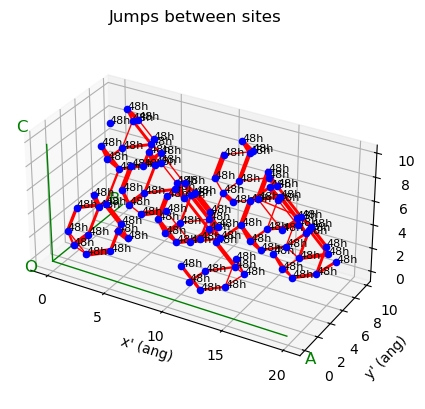

In [5]:
from gemdat.plots import jumps_3d

jumps_3d(jumps=jumps)

# Change these parameters, and recalculate the jumps
As you can see from the resulting plots, the long jumps disappeared, and fewer jumps are recorded

In [6]:
# Put it all together and create the transitions and jumps
transitions = Transitions.from_trajectory(
    trajectory=trajectory, structure=structure, floating_specie='Li', site_inner_fraction=0.25
)
jumps = Jumps(transitions=transitions, sites=sites, minimal_residence=10)

In [7]:
from gemdat.plots import jumps_vs_distance

fig = jumps_vs_distance(jumps=jumps, n_parts=4)
fig.show()

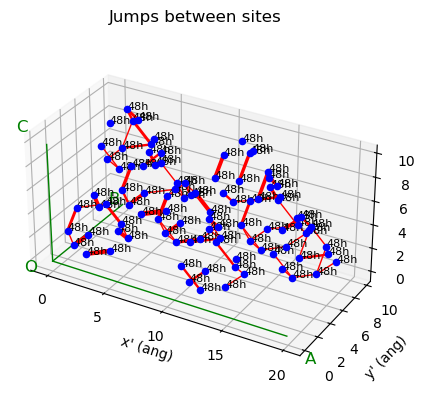

In [8]:
from gemdat.plots import jumps_3d

jumps_3d(jumps=jumps)

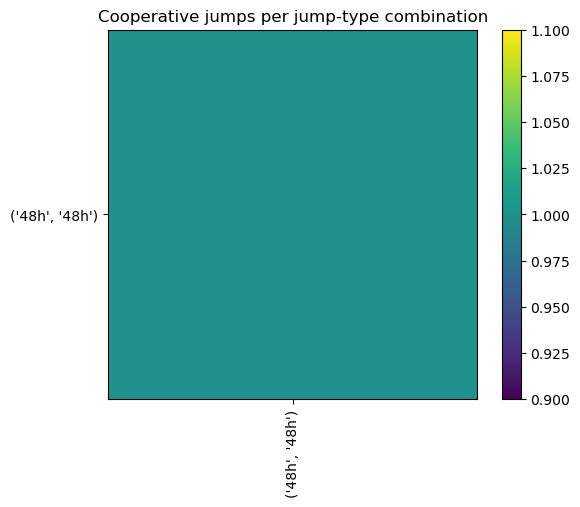

In [9]:
from gemdat.plots import collective_jumps

collective_jumps(jumps=jumps)

In [10]:
from gemdat.plots import jumps_vs_time

jumps_vs_time(jumps=jumps, n_parts=4)